# Name: Lam Han Vuong - 14521106

## Cluster Hand-Written-Digit from sklearn.datasets import load_digits


# Import Package


In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from random import randint
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from operator import itemgetter

## Read Data

In [2]:
digits = load_digits()
image, labels = digits.data, digits.target

In [3]:
image.shape

(1797, 64)

## Reduce Dimentions  using PCA

In [4]:
pca = decomposition.PCA(n_components=2)
train_reduced = pca.fit_transform(image)
colors = []
for i in range(max(labels)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

#### Show on plt

In [5]:

plt.show()
plt.figure(figsize=(7, 7))
for i in range(0,9): 
    plt.scatter(train_reduced[labels==i,0], train_reduced[labels ==i,1], s=100, c=colors[i], marker='*', label='cluster 1')


### Histogram of data

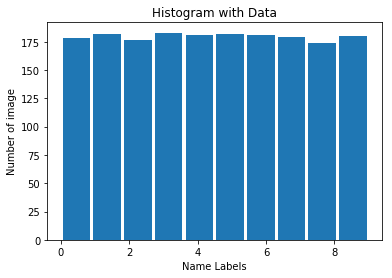

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
hist, bins = np.histogram(labels, bins=10)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
bins = np.array([0, 1, 2, 3, 4 ,5 ,6 ,7 ,8, 9])
plt.bar(center, hist, align='center', width=width)
plt.title("Histogram with Data")
plt.xlabel('Name Labels')
plt.ylabel('Number of image')
plt.show()

### property of data:

In [7]:
import collections
counts = collections.Counter(labels)
counts

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

# Create method to cluster

In [109]:
km = KMeans(n_clusters=max(labels)+1,init='random',n_init=100,max_iter=200,tol=1e-04,random_state=0)
sc = SpectralClustering(n_clusters=max(labels)+1,eigen_solver='arpack',affinity="nearest_neighbors", assign_labels= 'discretize')
ac = AgglomerativeClustering(n_clusters=max(labels)+1, affinity='euclidean')
db = DBSCAN(eps=20, min_samples=2)

## Clustering data

In [117]:
y_km=km.fit_predict(image)
y_sc=sc.fit_predict(image)
y_ac = ac.fit_predict(image)
y_db = db.fit_predict(image)

# Evaluate

### Show on plot result

In [118]:
def ValidValue(parameter):
    index_list_km = np.zeros(len(y_km), dtype=np.int)
    for i in range(0, max(parameter)+1):
        indexvalue = np.where(parameter==i)
        a = indexvalue
        value = itemgetter(*indexvalue)(labels)
        value= collections.Counter(value).most_common(1)[0][0]
        index_list_km[indexvalue] = value
    return index_list_km

In [119]:
y_km = ValidValue(y_km)
y_sc = ValidValue(y_sc)
y_ac = ValidValue(y_ac)
y_db = ValidValue(y_db)

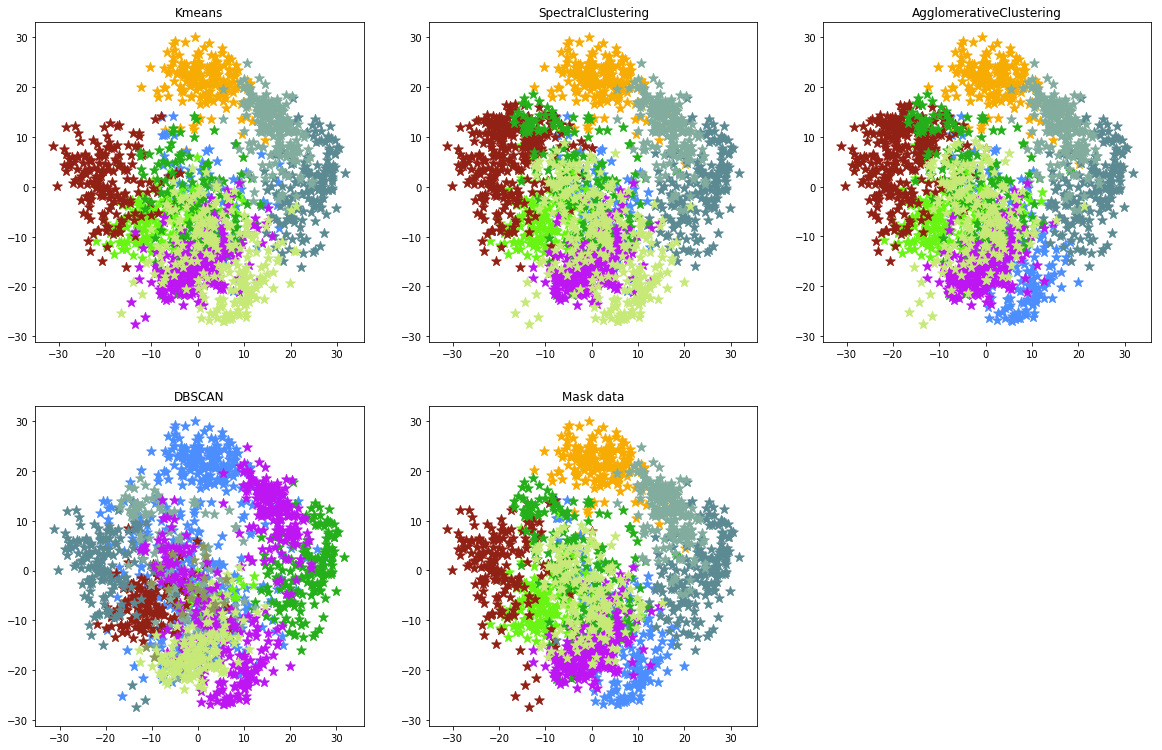

In [120]:

plt.show()
plt.figure(figsize=(20,20))
for i in range(0,max(labels)): 
    plt.subplot(331)
    plt.title('Kmeans')
    plt.scatter(train_reduced[y_km==i,0], train_reduced[y_km ==i,1], s=100, c=colors[i], marker='*', label='cluster 1')
    plt.subplot(332)
    plt.title('SpectralClustering')
    plt.scatter(train_reduced[y_sc==i,0], train_reduced[y_sc ==i,1], s=100, c=colors[i], marker='*', label='cluster 1')
    plt.subplot(333)
    plt.title('AgglomerativeClustering')
    plt.scatter(train_reduced[y_ac==i,0], train_reduced[y_ac ==i,1], s=100, c=colors[i], marker='*', label='cluster 1')
    plt.subplot(335)
    plt.title('Mask data')
    plt.scatter(train_reduced[labels==i,0], train_reduced[labels ==i,1], s=100, c=colors[i], marker='*', label='cluster 1') 
    plt.subplot(334)
    plt.title('DBSCAN')
    plt.scatter(train_reduced[y_db==i,0], train_reduced[y_db ==i,1], s=100, c=colors[i+1], marker='*')    
    

### Recall and Precision

In [122]:
from sklearn import metrics
print("K-mean Accurary: {0:.9f}".format(metrics.accuracy_score(labels, y_km)))
print("SpectralClustering Accurary: {0:.9f}".format(metrics.accuracy_score(labels, y_sc)))
print("AgglomerativeClustering Accurary: {0:.9f}".format(metrics.accuracy_score(labels, y_ac)))
print("DBSCAN: {0:.9f}".format(metrics.accuracy_score(labels, y_db)))

K-mean Accurary: 0.792431831
SpectralClustering Accurary: 0.820812465
AgglomerativeClustering Accurary: 0.861992209
DBSCAN: 0.728436283


In [12]:
from sklearn import metrics
print(metrics.adjusted_rand_score(labels,y_km))

0.666296645758


In [123]:
from sklearn import metrics
print("Classification Report")
print("Kmeans: ")
print(metrics.classification_report(labels,y_km, labels=[0,1,2,3,4,5,6,7,8,9]))
print("SpectralClustering: ")
print(metrics.classification_report(labels,y_sc, labels=[0,1,2,3,4,5,6,7,8,9]))
print("AgglomerativeClustering: ")
print(metrics.classification_report(labels,y_ac, labels=[0,1,2,3,4,5,6,7,8,9]))
print("DB: ")
print(metrics.classification_report(labels,y_db, labels=[0,1,2,3,4,5,6,7,8,9]))

Classification Report
Kmeans: 
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.59      0.30      0.40       182
          2       0.85      0.84      0.84       177
          3       0.88      0.84      0.86       183
          4       0.98      0.90      0.94       181
          5       0.91      0.75      0.82       182
          6       0.97      0.98      0.98       181
          7       0.85      0.98      0.91       179
          8       0.45      0.58      0.51       174
          9       0.56      0.77      0.65       180

avg / total       0.80      0.79      0.79      1797

SpectralClustering: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.71      0.46      0.56       182
          2       0.99      0.94      0.97       177
          3       0.53      0.93      0.67       183
          4       1.00      0.98      0.99 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
